### Example of displaying heatmap using folium

#### Import libraries  

In [14]:
import pandas as pd
import folium

#### Parameters

In [15]:
csv_in = 'data/pop_move_H27_H28-utf8.csv'

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#### Read CSV file

In [16]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())
#display(df)

(69, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   都道府県    69 non-null     object
 1   転入      69 non-null     int64 
 2   転出      69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB
None


,都道府県,転入,転出
0,北海道,48544,55418
1,青森県,17061,23384
2,岩手県,17113,20983
3,宮城県,47124,47607
4,秋田県,11353,15751


#### Calculation of increase/decrease of population  

In [17]:
df['増減'] = df['転入'] - df['転出']
display(df.head())

,都道府県,転入,転出,増減
0,北海道,48544,55418,-6874
1,青森県,17061,23384,-6323
2,岩手県,17113,20983,-3870
3,宮城県,47124,47607,-483
4,秋田県,11353,15751,-4398


#### Drop lines other than Prefs  

In [18]:
df['都道府県'].str.match(r'^(.*市|.*計|.*区部)$')  # debug

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57     True
58     True
59     True
60     True
61     True
62     True
63     True
64     True
65     True
66     True
67     True
68     True
Name: 都道府県, dtype: bool

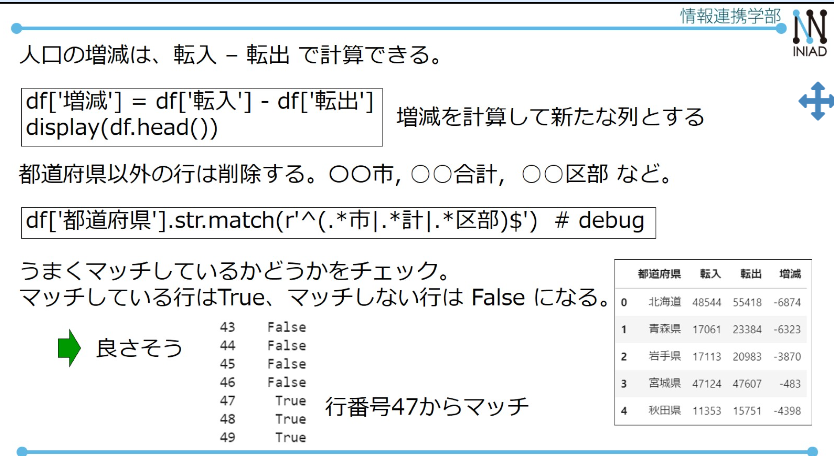

In [19]:
df2 = df.drop(df.index[df['都道府県'].str.match(r'^(.*市|.*計|.*区部)$') ]).reset_index(drop=True)
print(df2.info())
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   都道府県    47 non-null     object
 1   転入      47 non-null     int64 
 2   転出      47 non-null     int64 
 3   増減      47 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB
None


,都道府県,転入,転出,増減
0,北海道,48544,55418,-6874
1,青森県,17061,23384,-6323
2,岩手県,17113,20983,-3870
3,宮城県,47124,47607,-483
4,秋田県,11353,15751,-4398


#### Check data  

In [20]:
print(df2.loc[df2['増減'].idxmin()])
print(df2.loc[df2['増減'].idxmax()])

都道府県      北海道
転入      48544
転出      55418
増減      -6874
Name: 0, dtype: object
都道府県       東京都
転入      413444
転出      339267
増減       74177
Name: 12, dtype: object


#### Parameters2 (for lat/lon)   

In [21]:
csv_in2 = 'data/h3010pref_pos_utf8.csv'

#### Read CSV file

In [22]:
df_pos = pd.read_csv(csv_in2, sep=',', skiprows=0, header=0)
print(df_pos.shape)
display(df_pos.head())

(1963, 3)


,name,lat,lon
0,北海道,43.064278,141.346785
1,札幌市,43.061945,141.354395
2,札幌市中央区,43.055390,141.340980
3,札幌市北区,43.090691,141.340922
4,札幌市東区,43.076111,141.363616


#### Merge DataFrames to add lat/lon to pref data  

In [23]:
df_merged = pd.merge(df2, df_pos, left_on='都道府県', right_on='name', how='left')
print(df_merged.shape)
display(df_merged.head())

(47, 7)


,都道府県,転入,転出,増減,name,lat,lon
0,北海道,48544,55418,-6874,北海道,43.064278,141.346785
1,青森県,17061,23384,-6323,青森県,40.824338,140.740087
2,岩手県,17113,20983,-3870,岩手県,39.703647,141.152592
3,宮城県,47124,47607,-483,宮城県,38.268803,140.871846
4,秋田県,11353,15751,-4398,秋田県,39.718058,140.103250


#### Make data for heatmap  
[ [lat2, lon2, value2], [lat2, lon2, value2], ... ]  

In [24]:
df_heat = df_merged[['lat', 'lon', '増減']]
print(df_heat.shape)
display(df_heat.head())

(47, 3)


,lat,lon,増減
0,43.064278,141.346785,-6874
1,40.824338,140.740087,-6323
2,39.703647,141.152592,-3870
3,38.268803,140.871846,-483
4,39.718058,140.103250,-4398


#### Make map  

In [25]:
from folium.plugins import HeatMap

m = folium.Map(location=[35, 140], zoom_start=4)
m.add_child(HeatMap(df_heat, radius=12))
display(m)

#### Add color bar  

In [26]:
### Add color bar  

from folium.plugins import HeatMap
import branca.colormap as cm
import numpy as np

m = folium.Map(location=[35, 140], zoom_start=4)
m.add_child(HeatMap(df_heat, radius=12,
                    gradient={.4:"blue",.6:"cyan",.7:"lime",.8:"yellow",1:"red"}))

min = df_heat['増減'].min()
max = df_heat['増減'].max()
colors = ['blue', 'cyan', 'lime', 'yellow', 'red']
index = np.array([.4, .6, .7, .8, 1.])*(max-min)+min
colormap = cm.LinearColormap(colors, index=index, vmin=min, vmax=max).to_step(100)
colormap.caption = 'Increase/Decrease of Population'
m.add_child(colormap)

display(m)

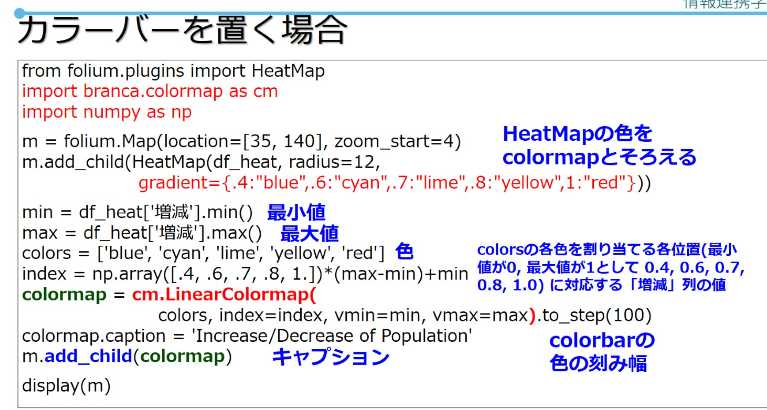